
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you so much for the updates! This project is hard and very time-consuming because of heavy models. You did an excellent job here, and I hope you enjoyed it.
    
    
I've left a couple of new comments with digit 2. However, I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi, Jasper! I am a reviewer on this project. I am very glad to see you on this sprint! 
    

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ❌</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content, however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> thank you very much for sending the project for a review! You have successfully employed advanced techniques such as lemmatization and vectorizing, and trained several models. Great job! The results look very good. 
    
    
However, would you add small conclusions about each chart in the EDA section and about each model in the `Working with models`?     

It will also be great if you print some basic information about the data we have.      

</div>

# Project Statement (NO BERT MODEL, commented out)

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Good introduction! 
    
</div>

## Initialization

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
It's a very useful thing, by the way.     
</div>

## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>  Reviewer's comment </b>
    

Let's print some basic info. Do we have any missing values?     
  
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>  Reviewer's comment </b>
    

You can also check for the tricky duplicates, such as `'review' - 'pos' - 'ds_part'` duplicates.  
    
  
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Well done!     
    
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Student's comment </h2>
    
    
Updated below.

</div>


In [6]:
# Identify duplicates including the original entries
duplicates_mask = df_reviews['review'].duplicated(keep=False)

# Filter the DataFrame to include both the original and duplicate entries
duplicates_including_originals = df_reviews[duplicates_mask]

duplicates_including_originals

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
1368,tt0081949,tvMiniSeries,A Town Like Alice,A Town Like Alice,1981,1981,301,0,"Drama,Romance,War",8.3,849,I have seen this film at least 100 times and I...,10,pos,1,test,9765
1370,tt0081949,tvMiniSeries,A Town Like Alice,A Town Like Alice,1981,1981,301,0,"Drama,Romance,War",8.3,849,I have seen this film at least 100 times and I...,10,pos,1,test,9768
1629,tt0098994,movie,"After Dark, My Sweet","After Dark, My Sweet",1990,\N,114,0,"Crime,Drama,Mystery",6.6,3098,THE JIST: See something else. This film was hi...,7,pos,1,train,7728
1630,tt0098994,movie,"After Dark, My Sweet","After Dark, My Sweet",1990,\N,114,0,"Crime,Drama,Mystery",6.6,3098,THE JIST: See something else. This film was hi...,7,pos,1,train,7729
1753,tt0086662,tvSeries,Airwolf,Airwolf,1984,1986,60,0,"Action,Adventure,Sci-Fi",6.7,9592,I used to watch this show when I was a little ...,9,pos,1,train,6769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47175,tt0463392,movie,Zombie Nation,Zombie Nation,2004,\N,81,0,Horror,2.0,7850,German filmmaker Ulli Lommel has managed a tas...,1,neg,0,train,10089
47194,tt0463392,movie,Zombie Nation,Zombie Nation,2004,\N,81,0,Horror,2.0,7850,German filmmaker Ulli Lommel has managed a tas...,1,neg,0,train,10108
47288,tt0972534,tvSeries,iCarly,iCarly,2007,2012,30,0,"Comedy,Family,Romance",6.6,31143,Nickelodeon has gone down the toilet. They hav...,1,neg,0,test,5652
47290,tt0972534,tvSeries,iCarly,iCarly,2007,2012,30,0,"Comedy,Family,Romance",6.6,31143,Nickelodeon has gone down the toilet. They hav...,1,neg,0,test,5655


It really does seem there are some duplicate reviews even though the indexes are different. This is probably due to server side processing when the reviews were submitted within multiple clicks. Let us remove those duplicates.

In [7]:
# Drop duplicates in review column
df_reviews = df_reviews.drop_duplicates(subset='review')

In [8]:
# Check duplicates
df_reviews['review'].duplicated().any()

False

In [9]:
df_reviews.isna().any()

tconst             False
title_type         False
primary_title      False
original_title     False
start_year         False
end_year           False
runtime_minutes    False
is_adult           False
genres             False
average_rating      True
votes               True
review             False
rating             False
sp                 False
pos                False
ds_part            False
idx                False
dtype: bool

In [10]:
df_reviews[df_reviews['average_rating'].isna() == True]

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


In [11]:
df_reviews[df_reviews['votes'].isna() == True]

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


In [12]:
df_reviews[df_reviews['primary_title'] == 'Mila Ass Painting']

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


In this case, NaNs in the average rating column won't affect the quality of the model. So I will leave them in.

## EDA

Let's check the number of movies and reviews over years.

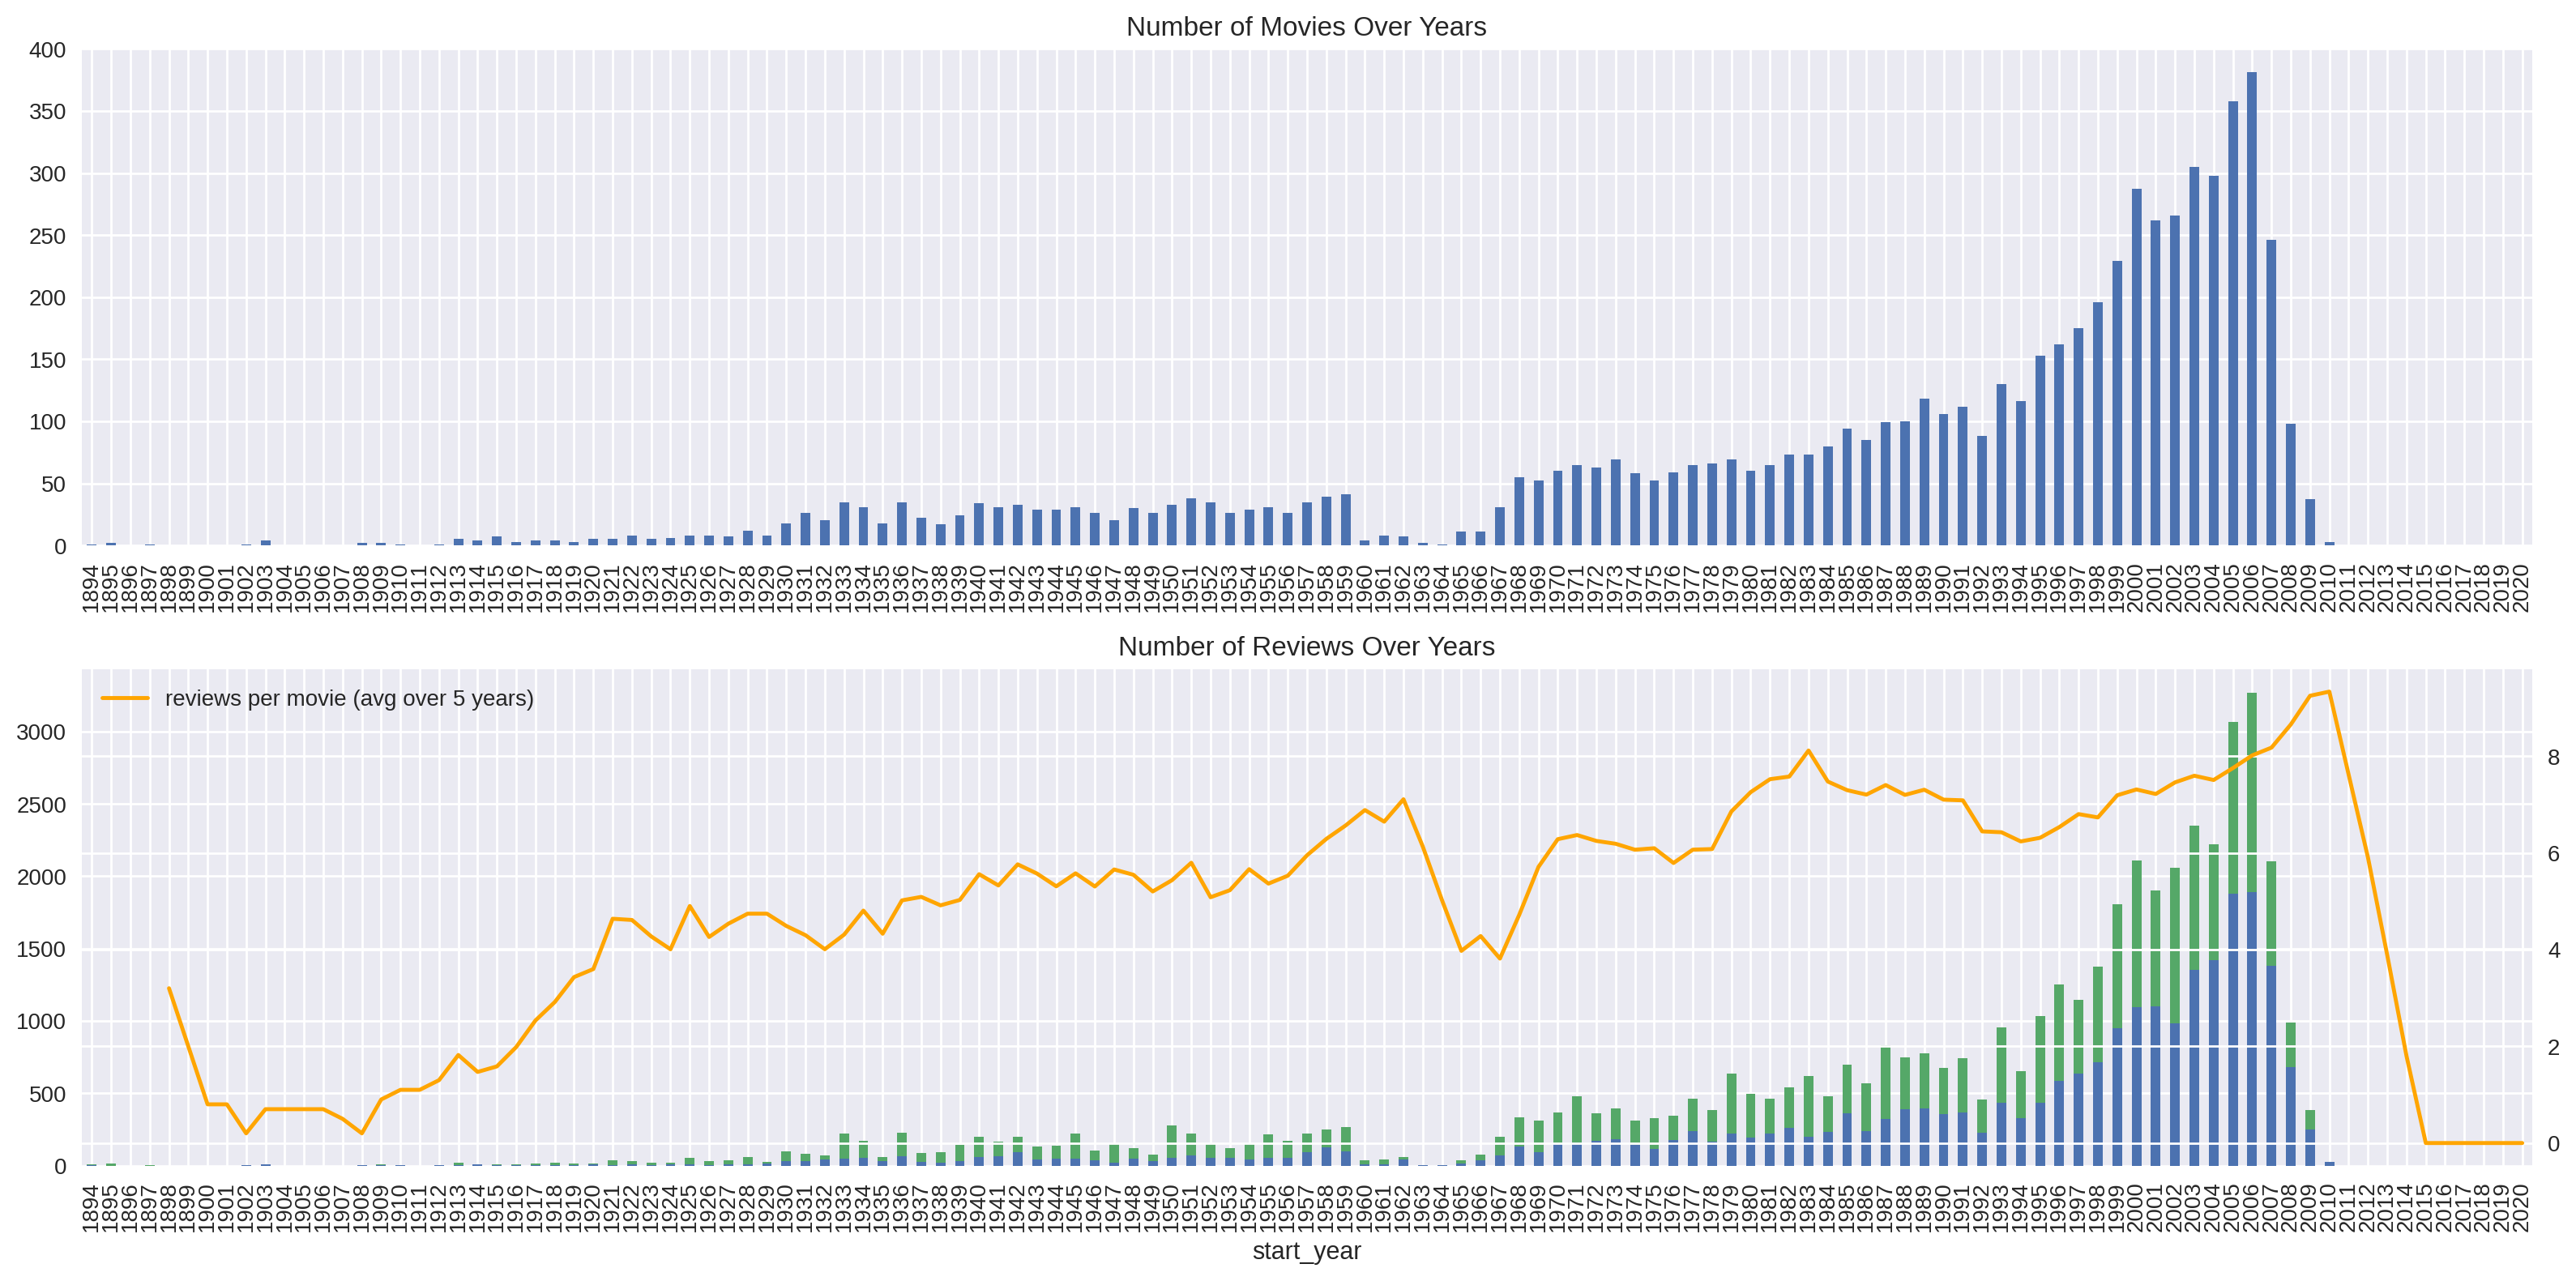

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Nice charts! 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
However, what can we infer from them?
    
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Student's comment </h2>
    
    
This tells us over the years, movies produced increased dramatically, while reviews only slightly increased. This also tells us that the dataset is taken from years before 2011.

</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Correct.     
</div>

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

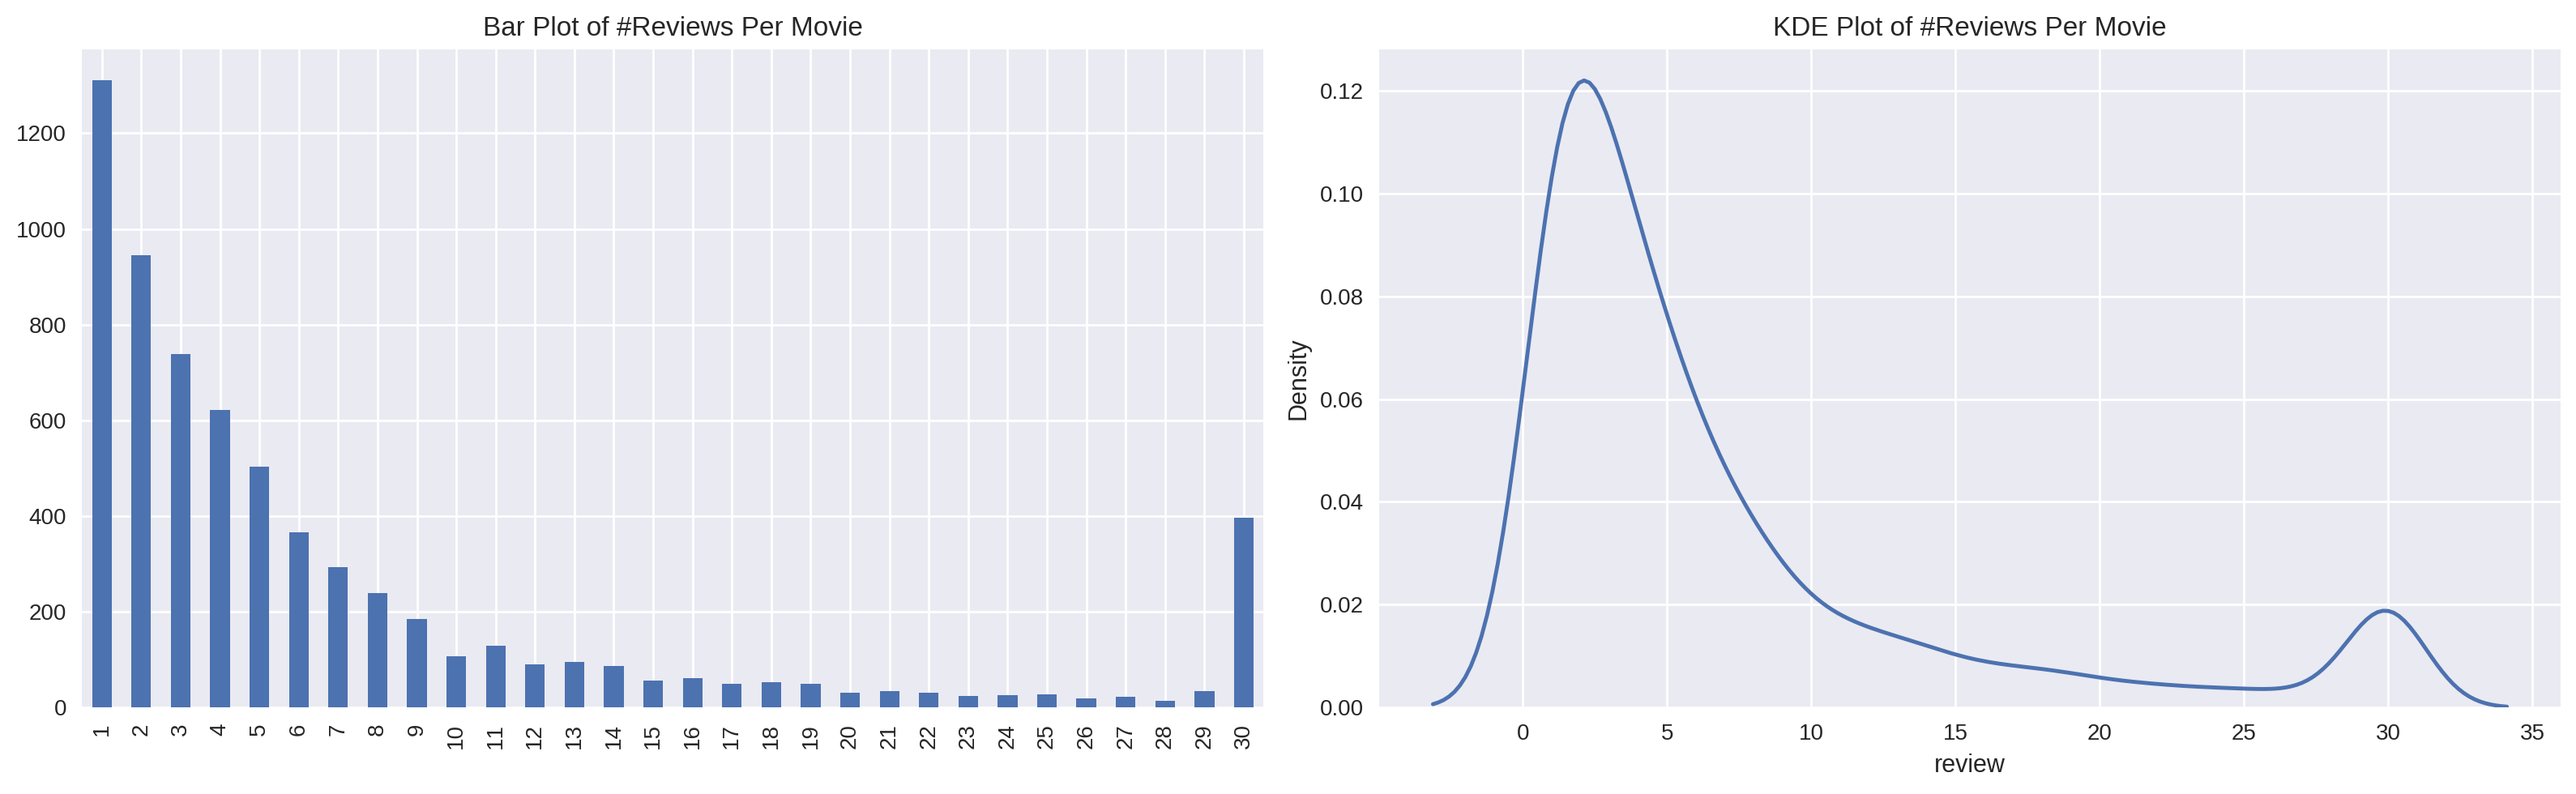

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
In your opinion, why do we have a peak there? Please do not forget to add intermediate conclusions. 

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Student's comment </h2>
    
    
This tells us that most movies are not so popular, and only have a few reviews on average.
As for the spike at 30, the # of reviews over 30 are also in the 30 bucket.

</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Agreed.    
</div>

In [15]:
df_reviews['pos'].value_counts()

0    23680
1    23560
Name: pos, dtype: int64

In [16]:
df_reviews['rating'].value_counts()

1     9574
10    9074
8     5566
4     5069
3     4702
7     4587
2     4335
9     4333
Name: rating, dtype: int64

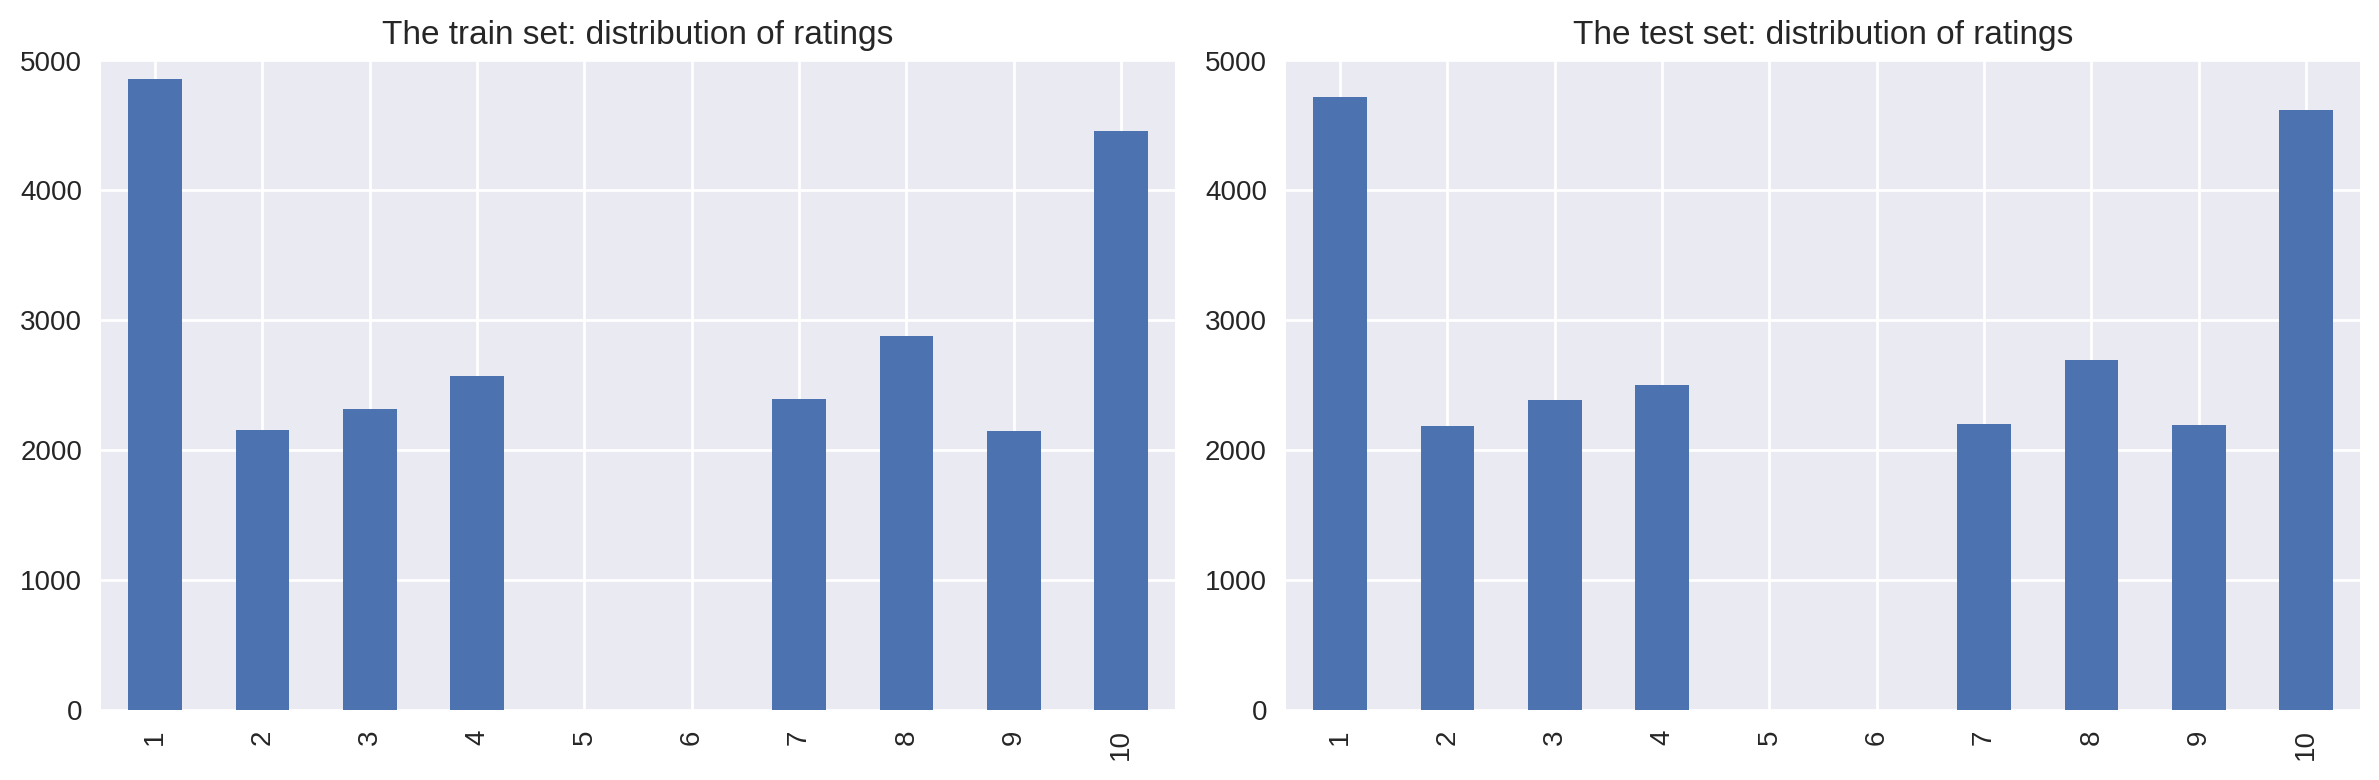

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Good.


</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
So what can we say about the distribution? 
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Student's comment </h2>
    
This tells us people tend to be very one-sided in whether they like the movie or not, choosing 1 or 10.
As for the gap in 5 or 6, this is either due to people really not choosing the 5 or 6 as baseline average, which is unlikely.
This is probably due to the creator of the dataset choosing people who tend to have a stronger opinion on the movies so they removed the people who think the movie is average (5 or 6).

</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Very good!     
</div>

Distribution of negative and positive reviews over the years for two parts of the dataset

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


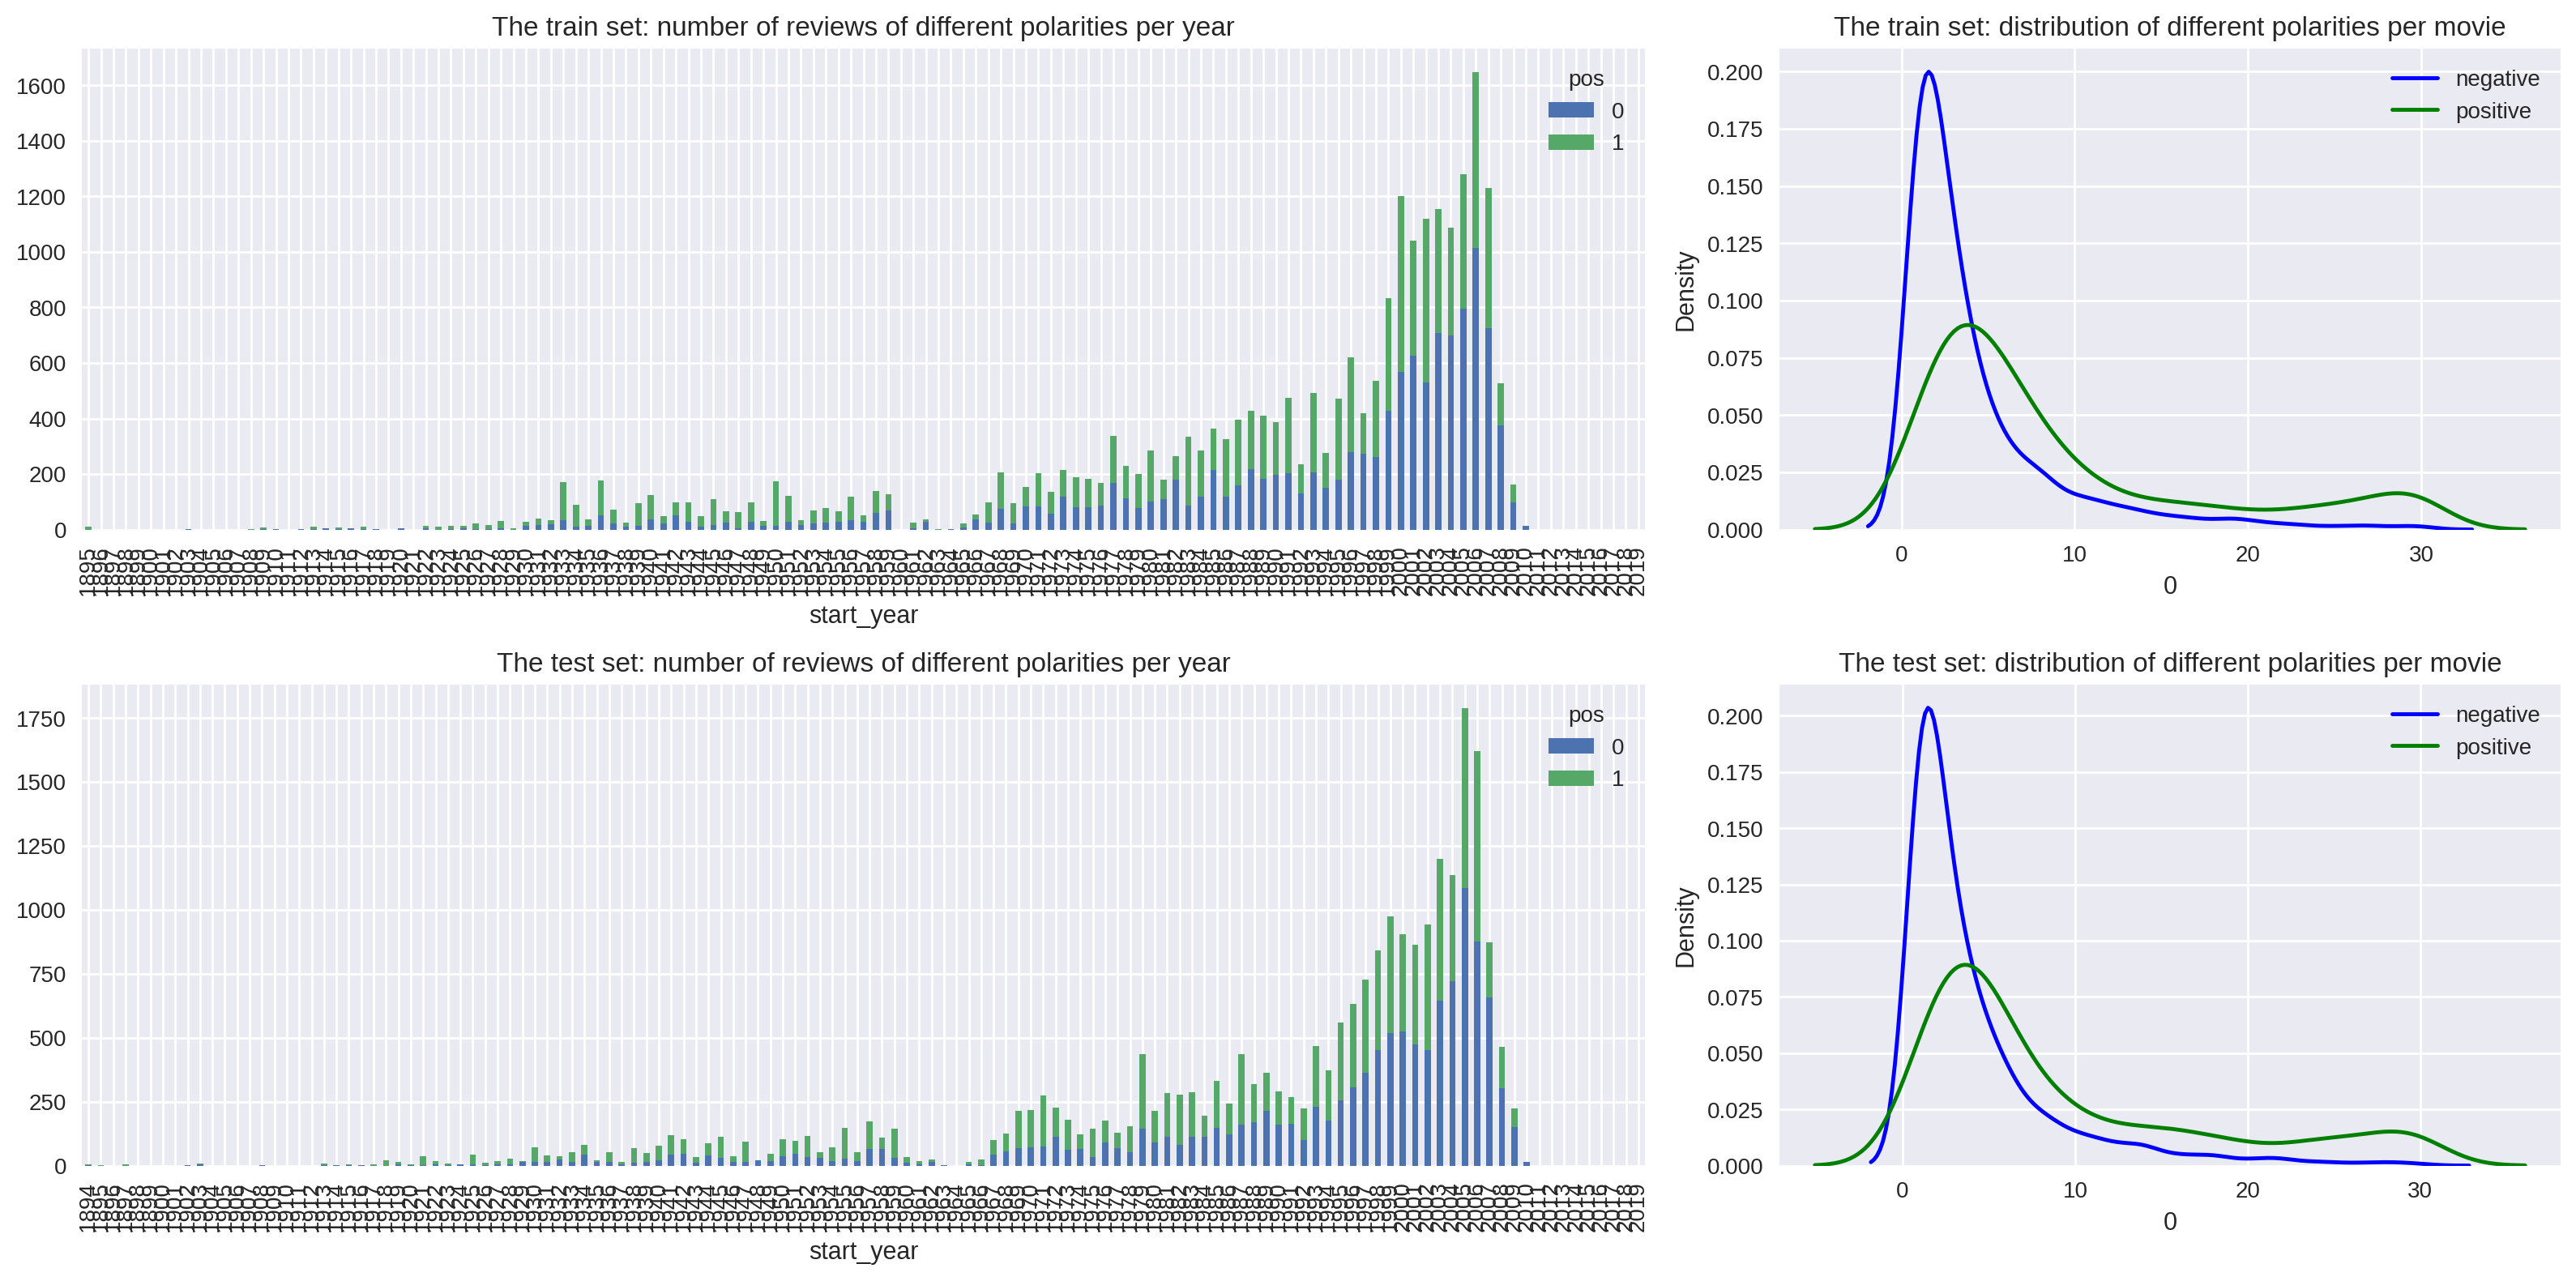

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Very good charts! 
    
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
    
It will be perfect after you add a conclusion.
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Student's comment </h2>
    
This tells us that people tend to leave negative reviews on smaller, more unpopular movies. This also tells us movies with fewer reviews tend to have more negative than positive reviews.
This seems to make sense, more popular movies tend to get more positive reviews (it's like a positive feedback loop). Unpopular movies tend to have more negative reviews, therefore less people watching and therefore less reviews.

</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Perfect!     
</div>

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [19]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

- According to [PEP8](https://peps.python.org/pep-0008/), we should always put imports at the top of the file.   


- Notice that **type** veriable is green in the function above. When you see that your variables are green, you should think of another name, since green color indicates that this name is reserved in python. I know that our example on the platform included a similar code, but it is a great opportunity to point out this thing. 
</div>

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [20]:
import re

def normalize_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove digits and punctuation
    text = re.sub(r'[\d\W_]+', ' ', text)
    return text

df_reviews['review_norm'] = df_reviews['review'].apply(normalize_text)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Nice code!     
</div>

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [21]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()


train_features = df_reviews_train.drop(columns='pos')
train_target = df_reviews_train['pos']
test_features = df_reviews_test.drop(columns='pos')
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23757, 18)
(23483, 18)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Correct. 

</div>

In [22]:
train_features
  

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,ds_part,idx,review_norm
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,train,8335,the pakage implies that warren beatty and gold...
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,train,8336,how the hell did they get this made presenting...
7,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,This true story of Carlson's Raiders is more o...,2,neg,train,9903,this true story of carlson s raiders is more o...
8,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,Should have been titled 'Balderdash!' Little i...,2,neg,train,9905,should have been titled balderdash little in t...
9,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240,The movie 'Gung Ho!': The Story of Carlson's M...,4,neg,train,9904,the movie gung ho the story of carlson s makin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47253,tt0286098,movie,Zu Warriors,Shu shan zheng zhuan,2001,\N,104,0,"Action,Fantasy",5.2,3324,O my gosh... Just give me a minute to breath. ...,10,pos,train,407,o my gosh just give me a minute to breath this...
47254,tt0286098,movie,Zu Warriors,Shu shan zheng zhuan,2001,\N,104,0,"Action,Fantasy",5.2,3324,I can't tell you all how much I love this movi...,10,pos,train,408,i can t tell you all how much i love this movi...
47255,tt0286098,movie,Zu Warriors,Shu shan zheng zhuan,2001,\N,104,0,"Action,Fantasy",5.2,3324,Legend of Zu is possibly the most exciting mov...,10,pos,train,409,legend of zu is possibly the most exciting mov...
47256,tt0286098,movie,Zu Warriors,Shu shan zheng zhuan,2001,\N,104,0,"Action,Fantasy",5.2,3324,This movie is well done on so many levels that...,10,pos,train,411,this movie is well done on so many levels that...


## Working with models

### Model 0 - Constant

In [23]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [24]:
model_0 = DummyClassifier()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Good. You can also check the result using different strategy values.
</div>

In [25]:
model_0.fit(train_features, train_target)

DummyClassifier()

In [26]:
predictions_0 = model_0.predict(test_features)

In [27]:
accuracy_0 = accuracy_score(predictions_0, test_target)
print(f'Dummy Classifier Accuracy: {accuracy_0}')

Dummy Classifier Accuracy: 0.5018524038666269


          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


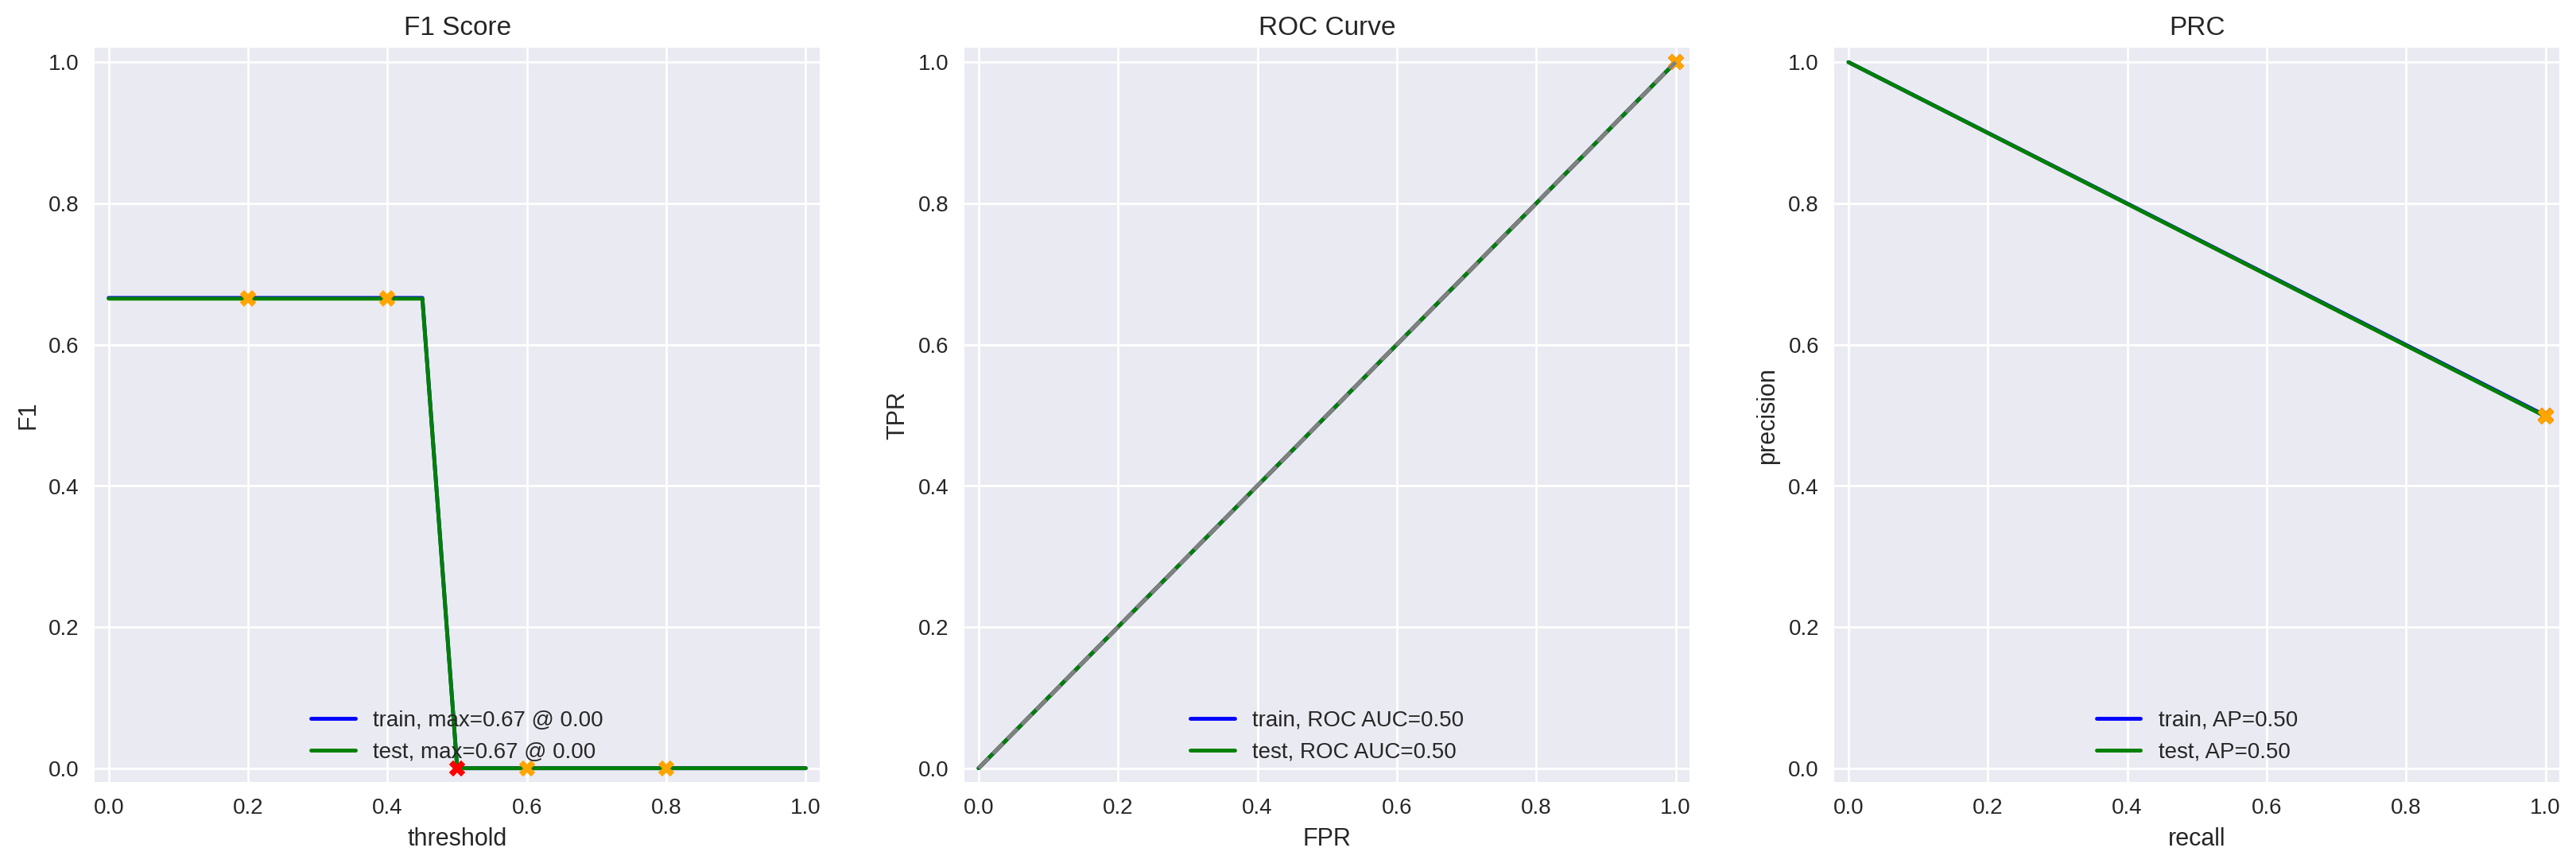

In [28]:
evaluate_model(model_0, train_features, train_target, test_features, test_target)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment</b>
    
Please add a conclusion here. How does the constant model perform? 
</div>


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Student's comment </h2>
    
    
Just as expected, the 0.5 accuracy tells us this is no better than pure random guessing, whether a movie is positive or negative.

</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Correct.     
</div>

### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [29]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords

In [30]:
lemmatizer  = WordNetLemmatizer()

In [31]:
# Function to lemmatize a text
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply the function to the 'review_norm' column and create a new column 'review_lemmatized'
train_features['review_lemmatized'] = train_features['review_norm'].apply(lemmatize_text)
train_corpus_1 = train_features['review_lemmatized']
test_features['review_lemmatized'] = test_features['review_norm'].apply(lemmatize_text)
test_corpus_1 = test_features['review_lemmatized']

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = set(nltk_stopwords.words('english'))
count_tf_idf_1 = TfidfVectorizer(stop_words=stop_words)

train_features_1 = count_tf_idf_1.fit_transform(train_corpus_1)
test_features_1 = count_tf_idf_1.transform(test_corpus_1)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct. 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
You do not need to create `corpus` variables, and you can just write `transform(test_features['review_lemmatized'])`. In large projects, with a lot of variables, it may turn out to be a very useful advice :) 
    
</div>

In [33]:
model_1 = LogisticRegression()
model_1.fit(train_features_1, train_target)

LogisticRegression()

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


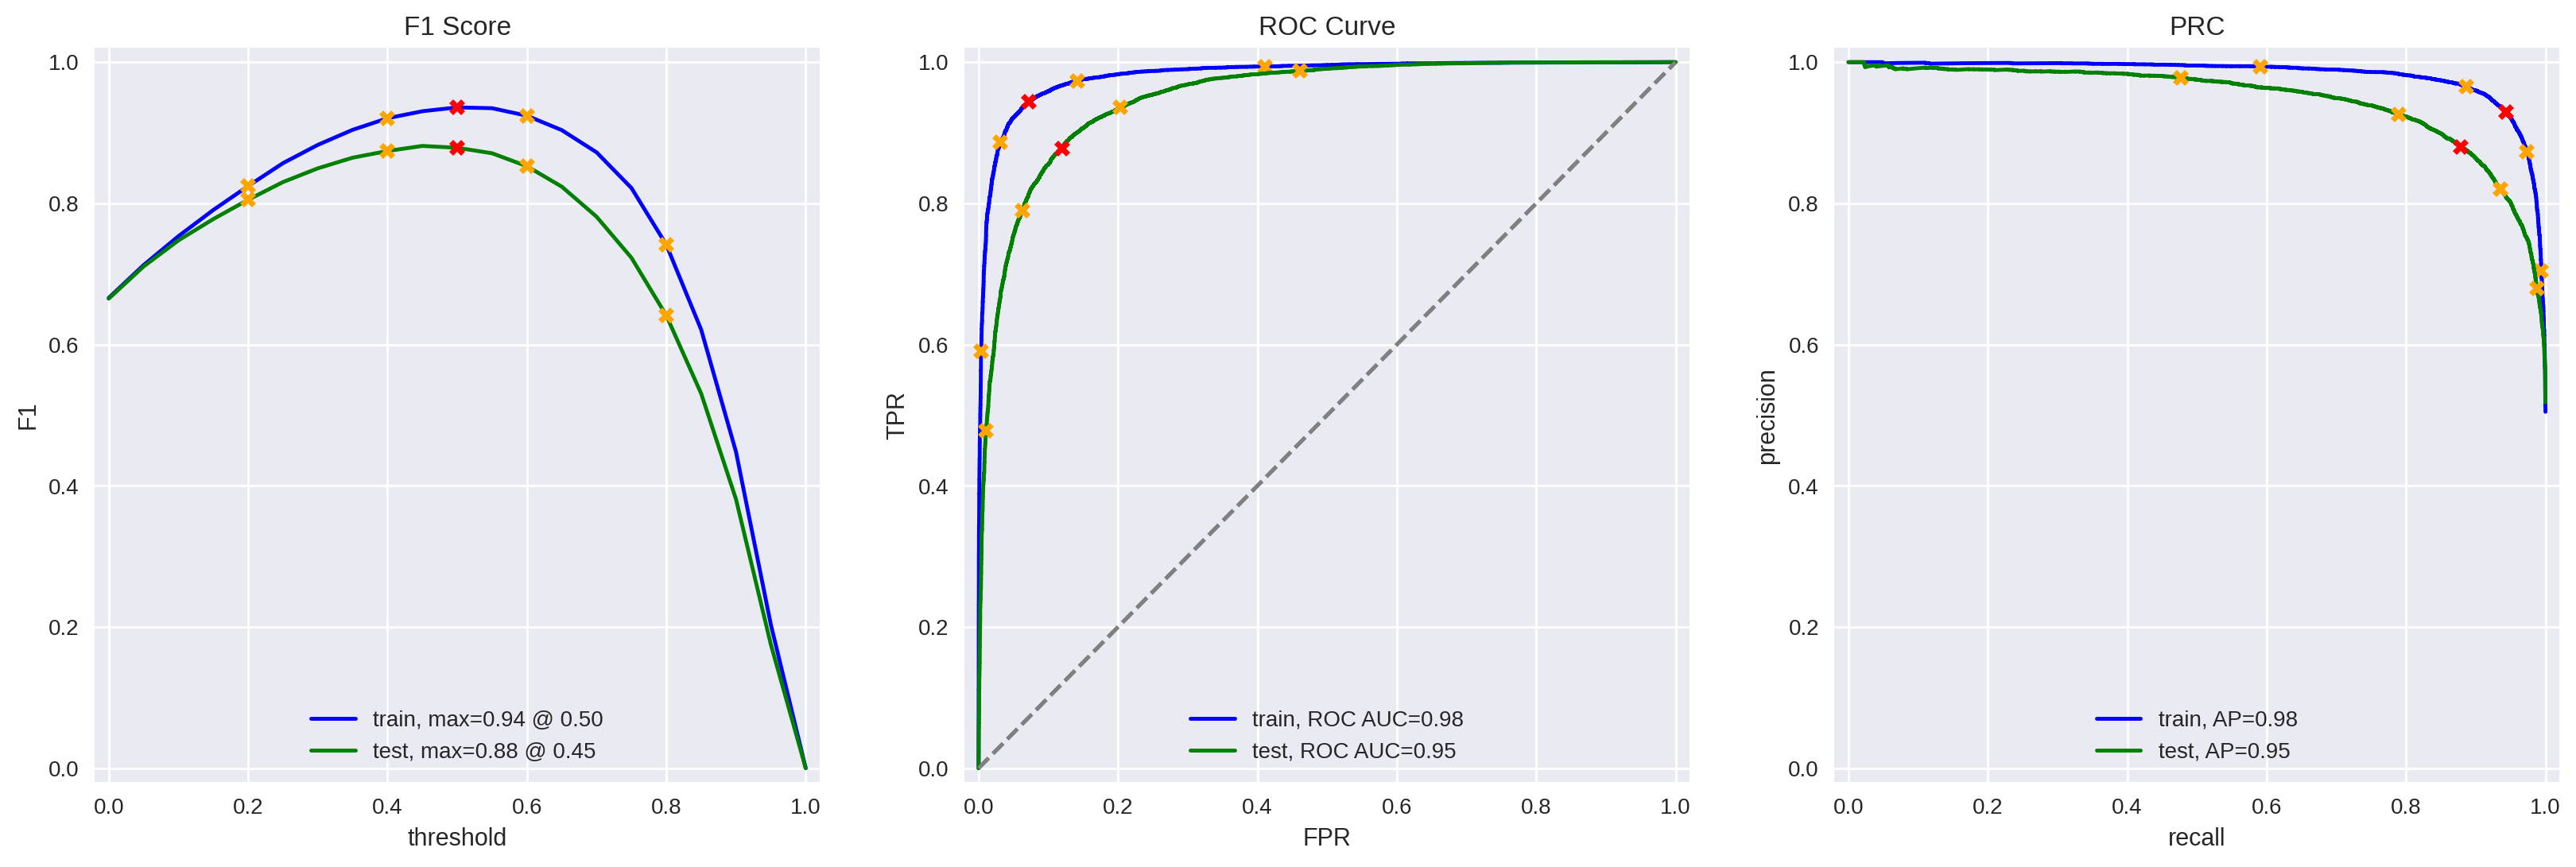

In [34]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
What can we say about its performance? 
    
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Student's comment </h2>
    
A high f1 score tells us that there is a good balance between precision and recall. Both high precision and high recall.
The ROC curve tells us that the model has a good measure of separability. Overall, the performance is very good.

</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Correct. The model exceeds the F1 threshold and has good precision. 
    
</div>

### Model 3 - spaCy, TF-IDF and LR

In [35]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [36]:
# Function for text preprocessing: lemmatization and optional stop word removal
def text_preprocessing_3(texts, remove_stopwords=True):
    docs = nlp.pipe(texts, batch_size=50)
    processed_texts = []
    for doc in docs:
        if remove_stopwords:
            tokens = [token.lemma_ for token in doc if not token.is_stop]
        else:
            tokens = [token.lemma_ for token in doc]
        processed_texts.append(' '.join(tokens))
    return processed_texts

In [37]:
# Apply the function to the 'review_norm' column and create a new column 'review_lemmatized'
train_features['review_lemmatized'] = text_preprocessing_3(train_features['review_norm'], remove_stopwords=True)
test_features['review_lemmatized'] = text_preprocessing_3(test_features['review_norm'], remove_stopwords=True)

In [38]:
train_corpus_3 = train_features['review_lemmatized']
test_corpus_3 = test_features['review_lemmatized']

In [39]:
count_tf_idf_3 = TfidfVectorizer()

train_features_3 = count_tf_idf_3.fit_transform(train_corpus_3)
test_features_3 = count_tf_idf_3.transform(test_corpus_3)

In [40]:
model_3 = LogisticRegression()
model_3.fit(train_features_3, train_target)

LogisticRegression()

          train  test
Accuracy   0.93  0.87
F1         0.93  0.87
APS        0.98  0.94
ROC AUC    0.98  0.95


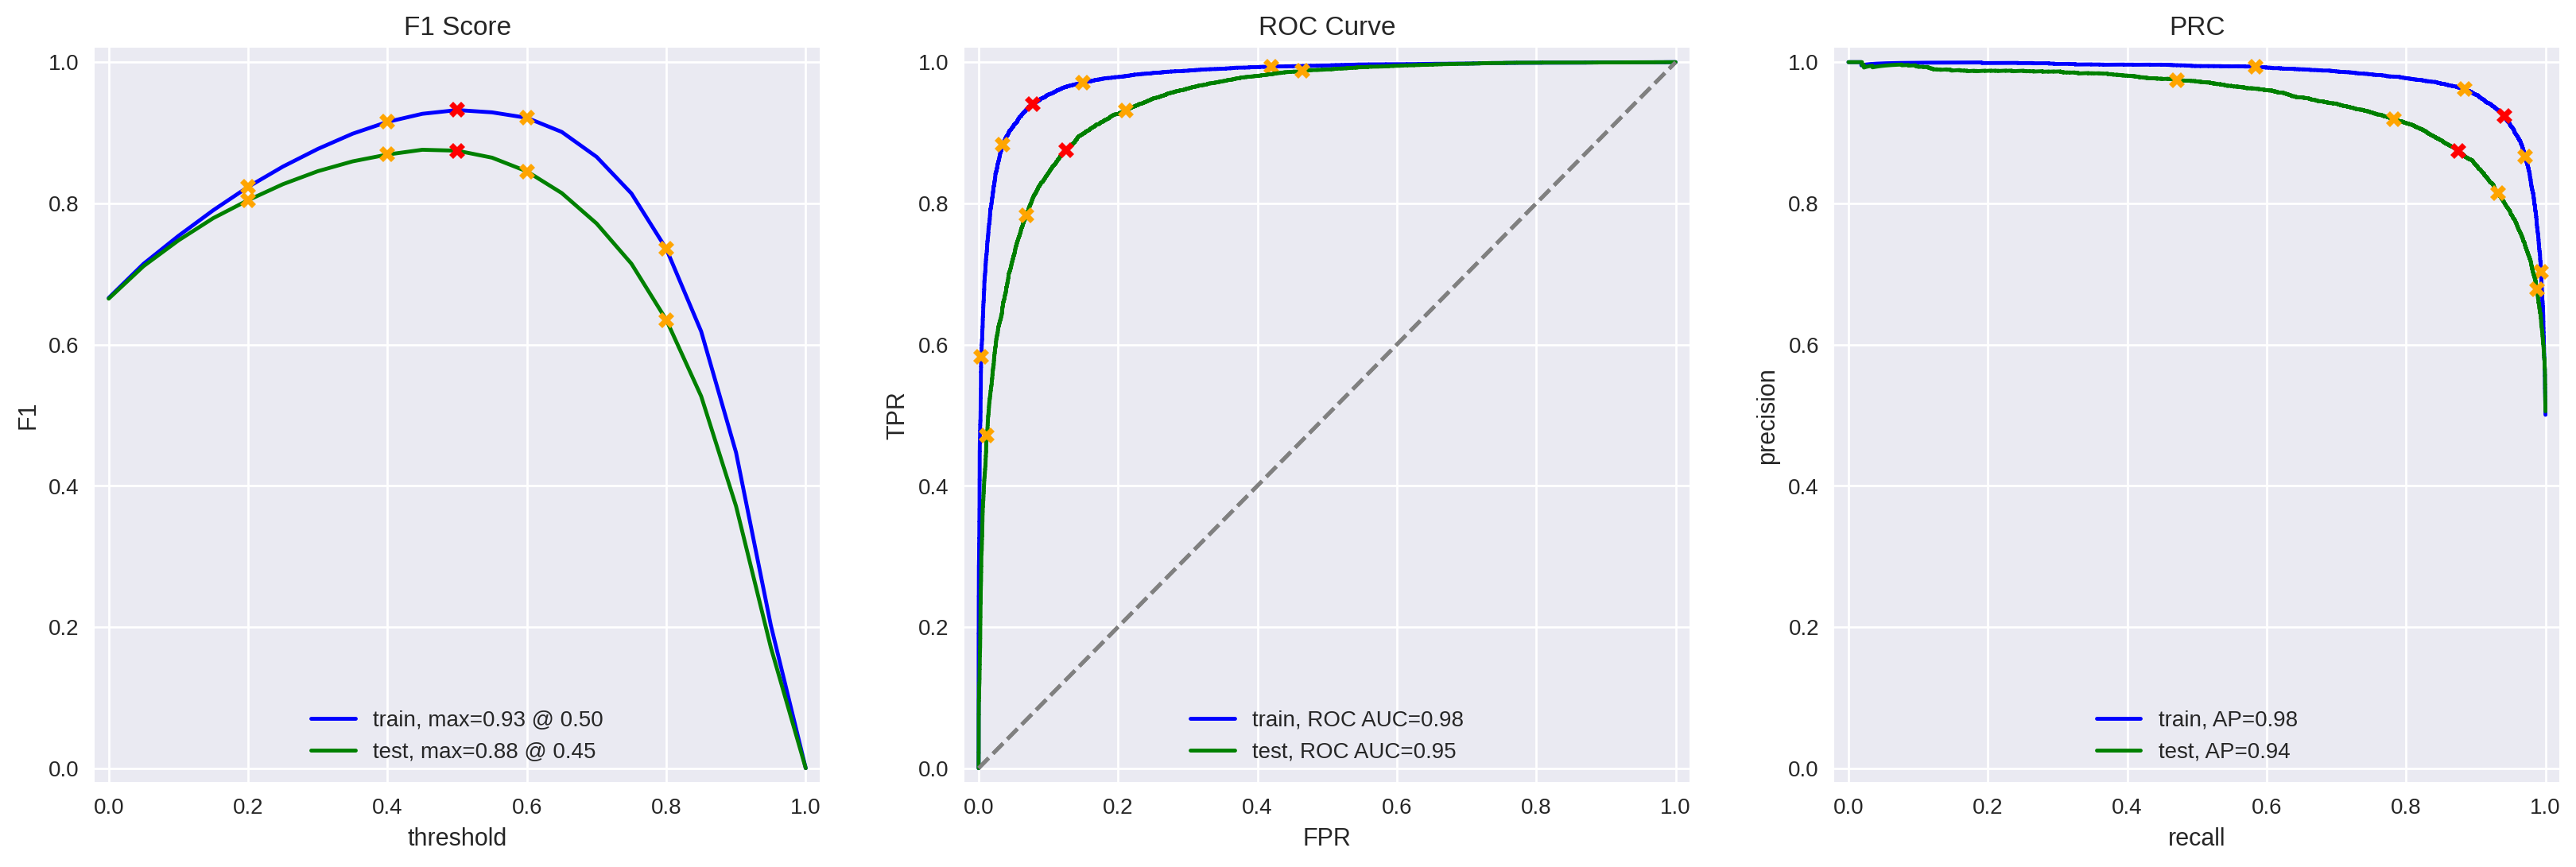

In [41]:
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct! 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
It will be perfect after you add a conclusion :) 
    
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Student's comment </h2>
    
Overall, the performance is very good, but model 1 performed better.

</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Correct. </div>

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [42]:
from lightgbm import LGBMClassifier

In [43]:
model_4 = LGBMClassifier()
model_4.fit(train_features_3, train_target)

LGBMClassifier()

          train  test
Accuracy   0.91  0.85
F1         0.91  0.85
APS        0.97  0.93
ROC AUC    0.97  0.93


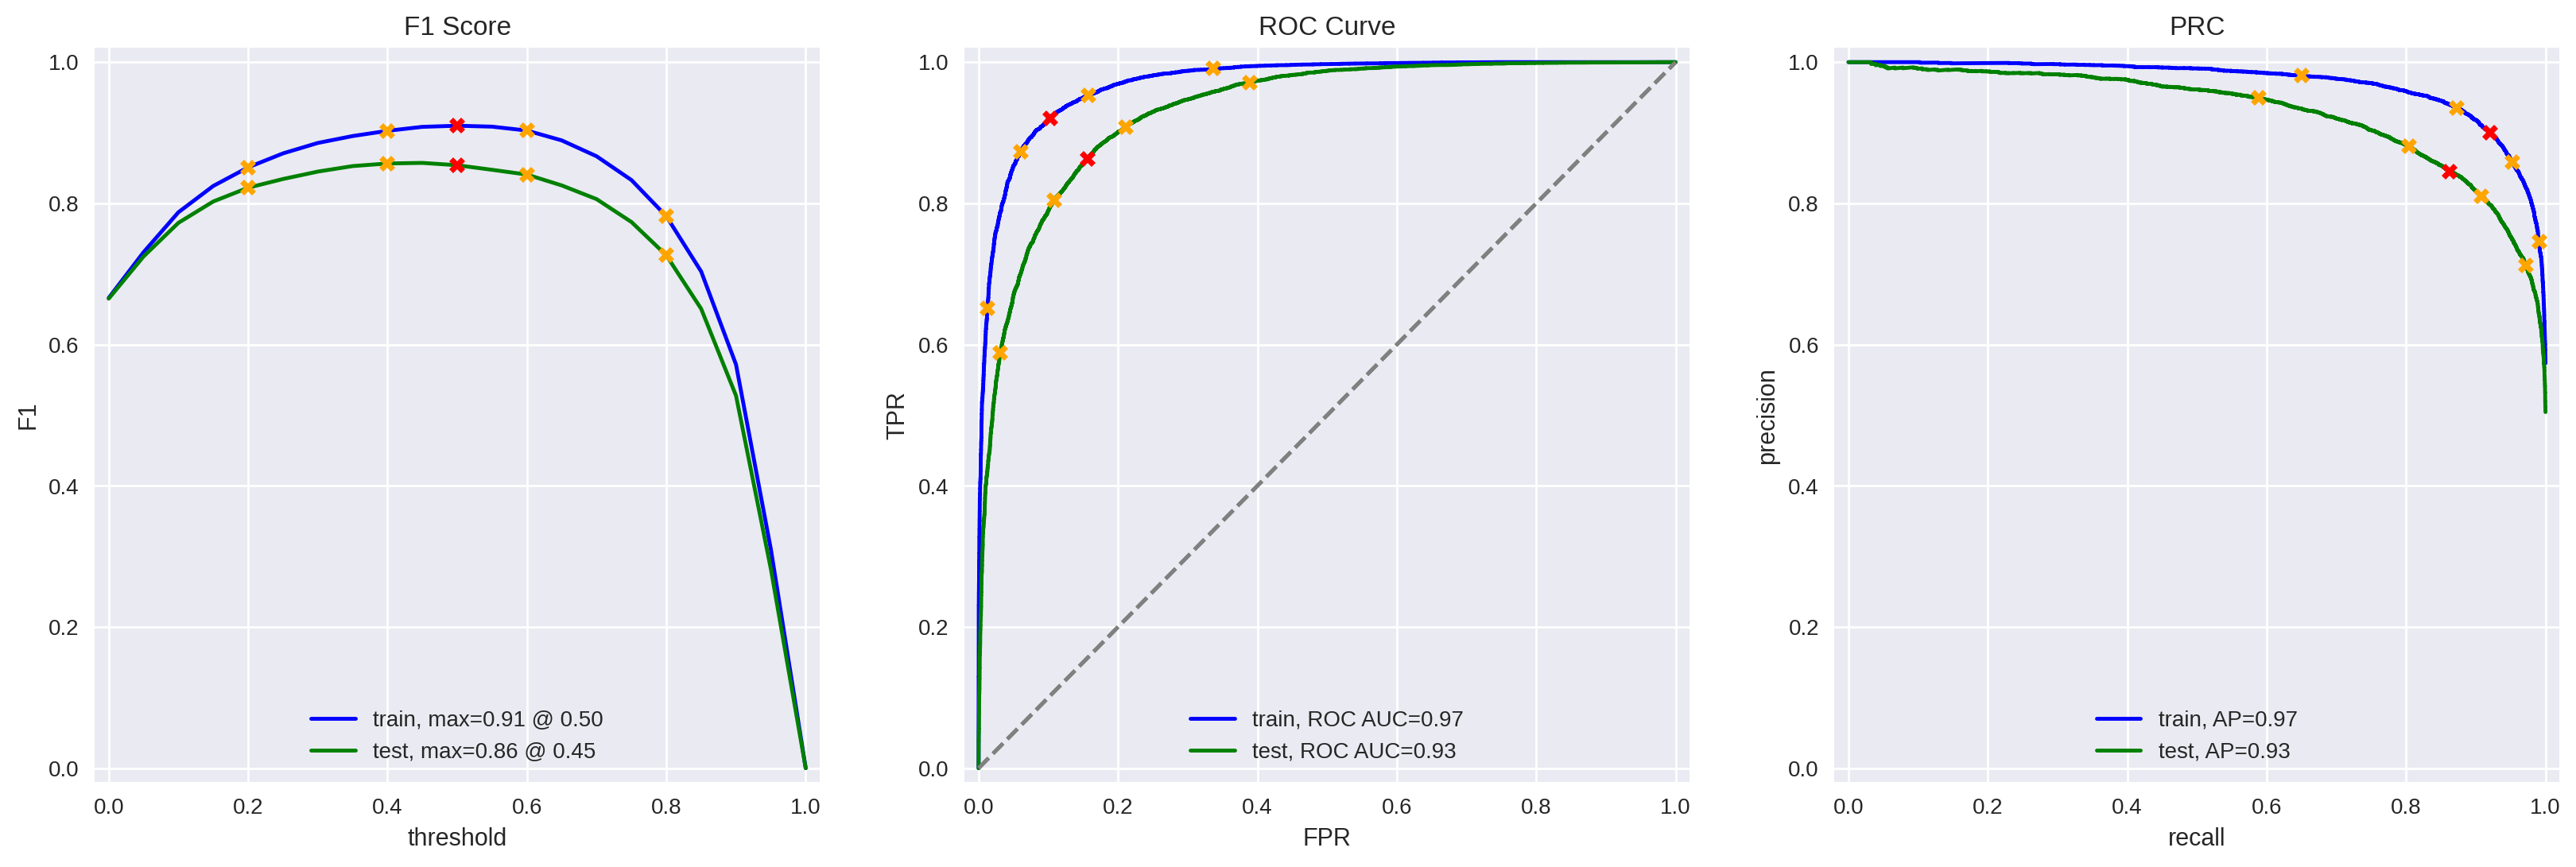

In [44]:
evaluate_model(model_4, train_features_3, train_target, test_features_3, test_target)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct. 
</div>


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Student's comment </h2>
    
While the performance is still good, it performed the worst out of the 3.

</div>


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Well done!     
</div>

###  Model 9 - BERT

In [45]:
# import torch
# import transformers

In [46]:
# tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
# config = transformers.BertConfig.from_pretrained('bert-base-uncased')
# model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [47]:
# def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
#     ids_list = []
#     attention_mask_list = []

#     # text to padded ids of tokens along with their attention masks
    
#     # <put your code here to create ids_list and attention_mask_list>
    
#     if force_device is not None:
#         device = torch.device(force_device)
#     else:
#         device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
#     model.to(device)
#     if not disable_progress_bar:
#         print(f'Using the {device} device.')
    
#     # gettings embeddings in batches

#     embeddings = []

#     for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
#         ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
#         # <put your code here to create attention_mask_batch
            
#         with torch.no_grad():            
#             model.eval()
#             batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
#         embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
#     return np.concatenate(embeddings)

In [48]:
# # Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
# train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [49]:
# print(df_reviews_train['review_norm'].shape)
# print(train_features_9.shape)
# print(train_target.shape)

In [50]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
The code is correct. 
</div>


## My Reviews

In [72]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.',
    'i wasreally fascinated'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(normalize_text)


my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn t expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...
8,really fascinated,really fascinated


### Model 1

In [73]:
texts = my_reviews['review_norm']
texts_lemm = texts.apply(lemmatize_text)

my_reviews_pred_prob = model_1.predict_proba(count_tf_idf_1.transform(texts_lemm))[:, 1]

my_test = count_tf_idf_1.transform(texts_lemm)
preds = model_1.predict(my_test)

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}: Prediction: {preds[i]} : {review}')

0.15: Prediction: 0 : i did not simply like it not my kind of movie 
0.14: Prediction: 0 : well i was bored and felt asleep in the middle of the movie 
0.46: Prediction: 0 : i was really fascinated with the movie
0.11: Prediction: 0 : even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.29: Prediction: 0 : i didn t expect the reboot to be so good writers really cared about the source material
0.54: Prediction: 1 : the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.03: Prediction: 0 : what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.87: Prediction: 1 : launching on netflix was a brave move i really appreciate being able to binge on episode after episo
0.58: Prediction: 1 : really fascinated


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Nice results. You can also print the predictions.
</div>


### Model 3

In [74]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(count_tf_idf_3.transform((text_preprocessing_3(texts, remove_stopwords=True))))[:, 1]

my_test = count_tf_idf_3.transform(text_preprocessing_3(texts, remove_stopwords=True))
preds = model_3.predict(my_test)

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}: Prediction: {preds[i]} : {review}')

0.19: Prediction: 0 : i did not simply like it not my kind of movie 
0.07: Prediction: 0 : well i was bored and felt asleep in the middle of the movie 
0.50: Prediction: 1 : i was really fascinated with the movie
0.15: Prediction: 0 : even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.19: Prediction: 0 : i didn t expect the reboot to be so good writers really cared about the source material
0.41: Prediction: 0 : the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.03: Prediction: 0 : what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.91: Prediction: 1 : launching on netflix was a brave move i really appreciate being able to binge on episode after episo
0.52: Prediction: 1 : really fascinated


### Model 4

In [75]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_4.predict_proba(count_tf_idf_3.transform((text_preprocessing_3(texts, remove_stopwords=True))))[:, 1]

my_test = count_tf_idf_3.transform(text_preprocessing_3(texts, remove_stopwords=True))
preds = model_4.predict(my_test)

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}: Prediction: {preds[i]} : {review}')

0.58: Prediction: 1 : i did not simply like it not my kind of movie 
0.27: Prediction: 0 : well i was bored and felt asleep in the middle of the movie 
0.59: Prediction: 1 : i was really fascinated with the movie
0.46: Prediction: 0 : even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.60: Prediction: 1 : i didn t expect the reboot to be so good writers really cared about the source material
0.57: Prediction: 1 : the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.25: Prediction: 0 : what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.79: Prediction: 1 : launching on netflix was a brave move i really appreciate being able to binge on episode after episo
0.61: Prediction: 1 : really fascinated


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Well done! 
    
</div>

### Model 9

In [55]:
# texts = my_reviews['review_norm']

# my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

# my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

# for i, review in enumerate(texts.str.slice(0, 100)):
#     print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

## Conclusions

In conclusion, model 1( and model 3 performed similiarly, while model 4 did not perform as well. Model 1 had the best metrics when evaluated. Model 3 came in second. While model 4 came in last in terms of the metrics, it seemed to do well on the training set and testing set.

When tested on my reviews, model 1 and model 3 performed similiarly with decisive positive and negative reviews. Model 4, on the otherhand, is more conservative about the reviews and tend to be more "on the fence" for classification. Overall, I would choose model 1.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Excellent, thank you so much! 

</div>


# Checklist

- [x]  Notebook was opened
- [ ]  The text data is loaded and pre-processed for vectorization
- [ ]  The text data is transformed to vectors
- [ ]  Models are trained and tested
- [ ]  The metric's threshold is reached
- [ ]  All the code cells are arranged in the order of their execution
- [ ]  All the code cells can be executed without errors
- [ ]  There are conclusions